<a href="https://colab.research.google.com/github/varshum12/Deep-Learning-23sep-2025-weekday/blob/main/keras_tuner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import  pandas as  pd
import seaborn as  sns
import matplotlib.pyplot as plt
import numpy as  np

In [2]:
df  =  pd.read_csv('e_commerce.csv')

In [3]:
df.head()

,account length,location code,user id,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn
0,128,415,3824657,no,yes,25,265,45,17,110.0,197,87,244.7,91,11.01,10.0,3,2.70,1.0,0
1,107,415,3717191,no,yes,26,162,27,17,123.0,196,103,254.4,103,11.45,13.7,3,3.70,1.0,0
2,137,415,3581921,no,no,0,243,41,10,114.0,121,110,162.6,104,7.32,12.2,5,3.29,0.0,0
3,84,408,3759999,yes,no,0,299,51,5,71.0,62,88,196.9,89,8.86,6.6,7,1.78,2.0,0
4,75,415,3306626,yes,no,0,167,28,13,113.0,148,122,186.9,121,8.41,10.1,3,2.73,3.0,0


In [4]:
df.columns

Index(['account length', 'location code', 'user id', 'credit card info save',
       'push status', 'add to wishlist', 'desktop sessions', 'app sessions',
       'desktop transactions', 'total product detail views',
       'session duration', 'promotion clicks', 'avg order value',
       'sale product views', 'discount rate per visited products',
       'product detail view per app session', 'app transactions',
       'add to cart per session', 'customer service calls', 'churn'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   account length                       3333 non-null   int64  
 1   location code                        3333 non-null   int64  
 2   user id                              3333 non-null   int64  
 3   credit card info save                3333 non-null   object 
 4   push status                          3333 non-null   object 
 5   add to wishlist                      3333 non-null   int64  
 6   desktop sessions                     3333 non-null   int64  
 7   app sessions                         3333 non-null   int64  
 8   desktop transactions                 3333 non-null   int64  
 9   total product detail views           3281 non-null   float64
 10  session duration                     3333 non-null   int64  
 11  promotion clicks              

In [6]:
df.isnull().sum()

,0
account length,0
location code,0
user id,0
credit card info save,0
push status,0
add to wishlist,0
desktop sessions,0
app sessions,0
desktop transactions,0
total product detail views,52


In [7]:
df.shape

(3333, 20)

In [8]:
# seperate  x and  y
x  = df.drop(['churn'] , axis  = 1)
y  = df['churn']

In [9]:
#  seperate cat and num data
cat  =  x.columns[x.dtypes  =='object']
num  =  x.columns[x.dtypes  !='object']

In [10]:
print(cat)
print()
print(num)

Index(['credit card info save', 'push status'], dtype='object')

Index(['account length', 'location code', 'user id', 'add to wishlist',
       'desktop sessions', 'app sessions', 'desktop transactions',
       'total product detail views', 'session duration', 'promotion clicks',
       'avg order value', 'sale product views',
       'discount rate per visited products',
       'product detail view per app session', 'app transactions',
       'add to cart per session', 'customer service calls'],
      dtype='object')


In [11]:
#  create pipline
from  sklearn.pipeline import Pipeline
from  sklearn.compose import ColumnTransformer
from  sklearn.preprocessing import  OneHotEncoder , StandardScaler
from  sklearn.impute  import SimpleImputer



In [12]:
num_pipeline  =  Pipeline(steps  =  [('imputer' ,  SimpleImputer(strategy='mean' )) ,
                                     ('scaler' ,  StandardScaler()) ])

cat_pipeline  =  Pipeline([('imputer' , SimpleImputer(strategy  =  'most_frequent' )) ,
                           ('encoder' ,  OneHotEncoder(handle_unknown= 'ignore'))])

In [13]:
pre =  ColumnTransformer([('num' ,  num_pipeline  ,  num) ,
                          ('cat' ,  cat_pipeline ,  cat)])

In [14]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 Index(['account length', 'location code', 'user id', 'add to wishlist',
       'desktop sessions', 'app sessions', 'desktop transactions',
       'total product detail views', 'session duration', 'promotion clicks',
       'avg order value', 'sale product views',
       'discount rate per visited products',
       'product detail view per app session', 'app transactions',
       'add to cart per session', 'customer service calls'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['credit card info save', 'push status'], dtype='object'))])

In [15]:
x_scaled  =  pd.DataFrame(pre.fit_transform(x) , columns  =  pre.get_feature_names_out())

In [16]:
x_scaled.head()

,num__account length,num__location code,num__user id,num__add to wishlist,num__desktop sessions,num__app sessions,num__desktop transactions,num__total product detail views,num__session duration,num__promotion clicks,...,num__sale product views,num__discount rate per visited products,num__product detail view per app session,num__app transactions,num__add to cart per session,num__customer service calls,cat__credit card info save_no,cat__credit card info save_yes,cat__push status_no,cat__push status_yes
0,0.676489,-0.523603,0.285359,1.234883,1.564550,1.557193,-0.020265,0.475057,-0.079666,-0.658138,...,-0.465494,0.866029,-0.088063,-0.601195,-0.085690,-0.430100,1.0,0.0,0.0,1.0
1,0.149065,-0.523603,-0.105965,1.307948,-0.327130,-0.384977,-0.020265,1.129111,-0.099387,0.145038,...,0.147825,1.059390,1.249269,-0.601195,1.241169,-0.430100,1.0,0.0,0.0,1.0
2,0.902529,-0.523603,-0.598534,-0.591760,1.160502,1.125600,-1.639456,0.676304,-1.578480,0.496427,...,0.198935,-0.755571,0.707108,0.211534,0.697156,-1.196647,1.0,0.0,1.0,0.0
3,-0.428590,-0.688834,0.049915,-0.591760,2.188988,2.204583,-2.796021,-1.487106,-2.742033,-0.607939,...,-0.567714,-0.078806,-1.316962,1.024263,-1.306401,0.336447,0.0,1.0,1.0,0.0
4,-0.654629,-0.523603,-1.600987,-0.591760,-0.235301,-0.277078,-0.945517,0.625992,-1.046007,1.098809,...,1.067803,-0.276562,-0.051918,-0.601195,-0.045885,1.102994,0.0,1.0,1.0,0.0


In [17]:
from sklearn.model_selection import train_test_split
x_train  , x_test  ,  y_train  ,  y_test  = train_test_split(x_scaled  ,  y
                                                             ,  test_size  =  0.2  ,  random_state  = 3)

In [18]:
print(x_train.shape  , y_train.shape)
print(x_test.shape  , y_test.shape)


(2666, 21) (2666,)
(667, 21) (667,)


In [19]:
# create  function  for  keras  tuner

In [20]:
%pip  install  keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 12.5 MB/s eta 0:00:00


In [39]:
import keras_tuner as  kt
from keras.models  import Sequential
from keras.layers  import  Dense , Input


In [42]:
def  build_model(hp):
  nn =  Sequential()


  u1 = hp.Int(name  =  'Units1' ,  min_value  =  32  ,  max_value =  512  ,  step  =  32)
  u2 = hp.Int(name  =  'Units2' ,  min_value  =  32  ,  max_value =  512  ,  step  =  32)
  u3 = hp.Int(name  =  'Units3' ,  min_value  =  32  ,  max_value =  512  ,  step  =  32)

  ##  add  layers
  nn.add(Input(shape  = ( x_train.shape[1]  ,   )))

  ## add hidden  layers
  nn.add(Dense(units  =  u2  ,  activation  =  'relu'))
  nn.add(Dense(units  =  u3  ,  activation  =  'relu'))

  # add  output layer
  nn.add(Dense(1  ,  activation  =  'sigmoid'))
  nn.compile(optimizer = 'adam' ,  loss = 'binary_crossentropy' ,  metrics  =  ['accuracy'])


In [43]:
tuner  =  kt.Hyperband(build_model ,  objective= 'val_loss' ,  directory  = 'my_dir' ,
                       project_name  =  'my_project')

In [28]:
x_train.isnull().sum()
y_train.isnull().sum()

np.int64(0)

In [33]:
import warnings
warnings.filterwarnings('ignore')

In [44]:
#  search
tuner.search(x_train  ,  y_train ,  epochs  =  5  , validation_split  =  0.2  )


Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
128               |128               |Units1
128               |128               |Units2
96                |96                |Units3
2                 |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
4                 |4                 |tuner/bracket
0                 |0                 |tuner/round



FatalTypeError: Expected the model-building function, or HyperModel.build() to return a valid Keras Model instance. Received: None of type <class 'NoneType'>.

In [45]:
tuner.get_best_hyperparameters()[0].get('Units1')


128

In [46]:
tuner.get_best_hyperparameters()[0].get('Units2')

128

In [47]:
tuner.get_best_hyperparameters()[0].get('Units3')

96

In [48]:
model  =  Sequential()
model.add(Dense(units  =  128  ,  kernel_initializer='he_uniform' ,  input_dim  = x_train.shape[1] ))

  ## add hidden  layers
model.add(Dense(units  =  128  ,  activation  =  'relu'))
model.add(Dense(units  =  96  ,  activation  =  'relu'))

  # add  output layer
model.add(Dense(1  ,  activation  =  'sigmoid'))
model.compile(optimizer = 'adam' ,  loss = 'binary_crossentropy' ,  metrics  =  ['accuracy'])

In [49]:
from  keras.callbacks import EarlyStopping
es  =  EarlyStopping(monitor  ='val_loss' ,  patience= 5  ,  restore_best_weights= True)

In [50]:
hist =  model.fit(x_train ,  y_train  ,
                  batch_size  =  64  ,  epochs = 50  , callbacks =  es , validation_split  =  0.2   )

Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.8462 - loss: 0.4364 - val_accuracy: 0.8801 - val_loss: 0.3063
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8989 - loss: 0.2745 - val_accuracy: 0.8876 - val_loss: 0.2831
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9220 - loss: 0.2200 - val_accuracy: 0.8933 - val_loss: 0.2715
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9279 - loss: 0.2054 - val_accuracy: 0.8970 - val_loss: 0.2528
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9374 - loss: 0.1791 - val_accuracy: 0.9064 - val_loss: 0.2496
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9433 - loss: 0.1599 - val_accuracy: 0.9045 - val_loss: 0.2706
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9421 - loss: 0.1678 - val_accuracy: 0.8970 - val_loss: 0.2540
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9578 - loss: 0.1411 - val_accuracy: 0.9026 - val_loss

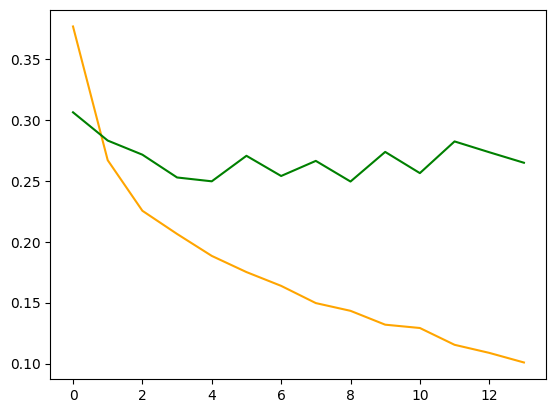

In [52]:
plt.plot(hist.history['loss'] ,c = 'orange' )
plt.plot(hist.history['val_loss'] ,c = 'green' )

In [53]:
#  evaluate  models
model.evaluate(x_train  , y_train)

84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9627 - loss: 0.1245


[0.14862249791622162, 0.9564891457557678]

In [54]:
model.evaluate(x_test , y_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9189 - loss: 0.2802


[0.22846804559230804, 0.9250375032424927]

In [55]:
#  evlaute on training and  testing
train_pred  =  model.predict(x_train)
test_pred  =  model.predict(x_test)

84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [56]:
train_pred

array([[0.00197166],
       [0.00713374],
       [0.00366734],
       ...,
       [0.05886395],
       [0.52922666],
       [0.7996935 ]], dtype=float32)

In [57]:
y_train_pred  =  []
for  i in train_pred:
  if  i>= 0.5:
    y_train_pred.append(1)
  else:
    y_train_pred.append(0)

In [58]:
from sklearn.metrics  import classification_report ,  confusion_matrix

In [59]:
print(classification_report(y_train ,  y_train_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2277
           1       0.89      0.80      0.84       389

    accuracy                           0.96      2666
   macro avg       0.93      0.89      0.91      2666
weighted avg       0.96      0.96      0.96      2666



In [60]:
print(confusion_matrix(y_train ,  y_train_pred))

[[2240   37]
 [  79  310]]


In [61]:
#  evaluation  for  testing
y_test_pred  =  []
for  i  in test_pred  :
  if  i  >= 0.5:
    y_test_pred.append(1)
  else:
    y_test_pred.append(0)

In [62]:
print(classification_report(y_test  , y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       573
           1       0.79      0.64      0.71        94

    accuracy                           0.93       667
   macro avg       0.87      0.81      0.83       667
weighted avg       0.92      0.93      0.92       667



In [63]:
print(confusion_matrix(y_test  ,  y_test_pred))

[[557  16]
 [ 34  60]]
